# PROJECT

##Import all relevant libraries here

In [77]:
#0. import all necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report, confusion_matrix
from scipy.stats import mode



## Import dataset


The dataset has been uploaded to Google drive and the link is


In [78]:
#1. import google drive into colab
from google.colab import drive

#2. mount the drive
drive.mount('/content/drive')

#3. read the dataset (in CSV format) into a python dataframe using pandas
df = pd.read_csv('/content/drive/MyDrive/CSC311MLUSL_DATASET.csv')

#4. preview the data
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Area,Perimeter,Compactness,Length,Width,Asymmetry,kernel_len,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


## Separate X and Y
## let Y be the label and X all other columns

Text(0, 0.5, 'Perimeter')

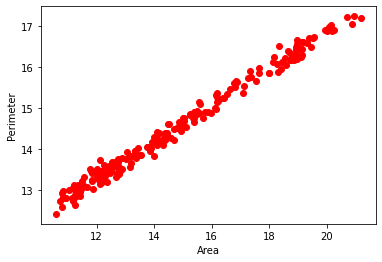

In [79]:
df2=df[['Area','Perimeter','Compactness','Length','Width','Asymmetry','kernel_len','class']]
X = df2.loc[:,df2.columns !='class']
Y = df2.loc[:,df2.columns =='class']
#print(Y)
df['class']= df['class'].map(
    {1:0,2:1,3:2})
df

plt.scatter(X.iloc[:,0],X.iloc[:,1],c='Red')
plt.xlabel("Area")
plt.ylabel("Perimeter")
#plot Area vs Perimeter 



## KMeans

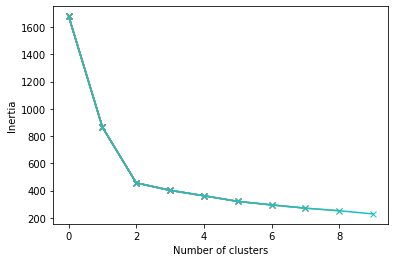

In [80]:
#scale your data
#plot an Elbow graph using 10 iterations
#plot Inertia vs number of clusters 

scaler=StandardScaler()
df2_scaled=scaler.fit_transform(df2)

temp=[]
for c in range(1,11):
  km=KMeans(n_clusters=c,init='k-means++')
  km.fit(df2_scaled)
  temp.append(km.inertia_)

  plt.plot(range(len(temp)),temp,marker='x')
  plt.xlabel('Number of clusters')
  
  plt.ylabel('Inertia')


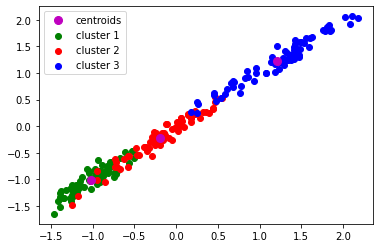

In [81]:
#cluster the dataset using k = 3
km=KMeans(n_clusters=3)
labels=km.fit_predict(df2_scaled)
centroids=km.cluster_centers_
 
cluster1=df2_scaled[labels == 0]
cluster2=df2_scaled[labels == 1]
cluster3=df2_scaled[labels == 2]


#plot the results of Area and Perimeter 
plt.scatter(cluster1[:,0],cluster1[:,1],color='green',label='cluster 1')
plt.scatter(cluster2[:,0],cluster2[:,1],color='red' ,label='cluster 2')
plt.scatter(cluster3[:,0],cluster3[:,1],color='blue', label='cluster 3')
#show the 3 clusters and their centroids
plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=8,label='centroids')
plt.legend()
plt.show()
#show the 3 clusters and their centroids




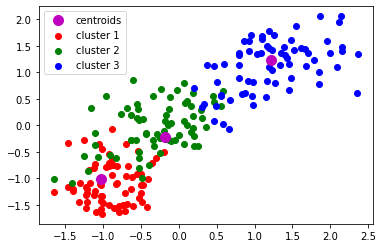

In [82]:
#plot the results of Length and Width 
plt.scatter(cluster1[:,3],cluster1[:,4],color='red',label='cluster 1')
plt.scatter(cluster2[:,3],cluster2[:,4],color='green', label= 'cluster 2')
plt.scatter(cluster3[:,3],cluster3[:,4],color='blue',label='cluster 3')



#show the 3 clusters and their centroids
plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=10,label='centroids')
plt.legend()
plt.show()

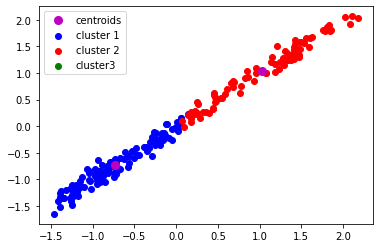

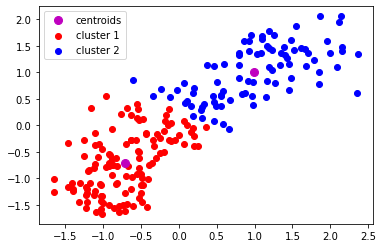

In [83]:
#Now lets cluster the dataset using the number of k you select from the Elbow method above
km=KMeans(n_clusters=2)
labels=km.fit_predict(df2_scaled)
centroids=km.cluster_centers_

cluster1=df2_scaled[labels==0]
cluster2=df2_scaled[labels==1]
cluster3=df2_scaled[labels==2]

 
#plot the results of Area and Perimeter 
plt.scatter(cluster1[:,0],cluster1[:,1], color='blue',label='cluster 1')
plt.scatter(cluster2[:,0],cluster2[:,1], color='red',label='cluster 2')
plt.scatter(cluster3[:,0],cluster3[:,1], color='green',label='cluster3')


#show the 3 clusters and their centroids
plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=8,label='centroids')
plt.legend()
plt.show()

##plot the results of Length and Width for k=2
plt.scatter(cluster1[:,3],cluster1[:,4], color='red',label='cluster 1')
plt.scatter(cluster2[:,3],cluster2[:,4],color='blue',label='cluster 2')


#show the 3 clusters and their centroids
plt.plot(centroids[:,3],centroids[:,4] ,'mo',markersize=8,label='centroids')
plt.legend()
plt.show()



### Calculate Accuracies of KMeans

In [84]:
#compare accucies of both clustering i.e. k = 3 vs k = your choice

scalar=StandardScaler()
Xnew=scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test= train_test_split(Xnew,Y,test_size=0.3, random_state=101,shuffle=True)

km=KMeans(n_clusters=3)
label=km.fit_predict(df2_scaled)



print("Accuracy Score for k=3 ",accuracy_score(Y,label)*100)  
print("\n k=3 vs k=2 \n")
km=KMeans(n_clusters=2)
results=km.fit_predict(df2_scaled)
print("Accuracy Score for k=2 ",accuracy_score(Y,results)*100)








Accuracy Score for k=3  32.38095238095238

 k=3 vs k=2 

Accuracy Score for k=2  8.571428571428571


##AHC

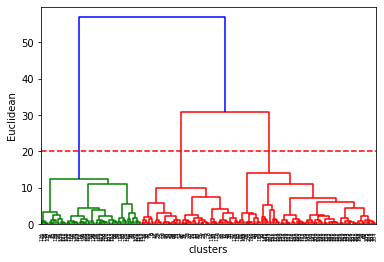

In [85]:
#Plot Dendrogram to determin the number of clusters
from scipy.cluster import hierarchy as sch

sch.dendrogram(sch.linkage(X,method="ward"))
plt.xlabel("clusters")
plt.ylabel("Euclidean")
plt.axhline(y=20,color='r',linestyle='--')
plt.show()

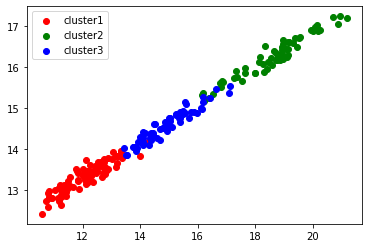

In [86]:
#Perform AHC clustering with number of clusters found in the dendrogram 
from sklearn.cluster import AgglomerativeClustering

ahc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y=ahc.fit_predict(X)
X=np.array(X)

plt.scatter(X[y==0,0],X[y==0,1],c='red',label='cluster1')
plt.scatter(X[y==1,0],X[y==1,1],c='green',label='cluster2')
plt.scatter(X[y==2,0],X[y==2,1],c='blue',label='cluster3')
plt.legend()
plt.show()


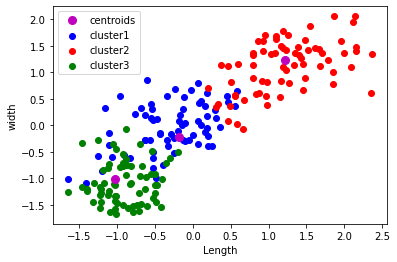

In [87]:
#plot scatter plots from B2, for Lenght and width, including cluster centroids
km=KMeans(n_clusters=3)
labels=km.fit_predict(df2_scaled)
centroids=km.cluster_centers_

cluster1=df2_scaled[labels==0]
cluster2=df2_scaled[labels==1]
cluster3=df2_scaled[labels==2]

plt.scatter(cluster1[:,3] ,cluster1[:,4],color='blue',label='cluster1')
plt.scatter(cluster2[:,3],cluster2[:,4],color='red',label='cluster2')
plt.scatter(cluster3[:,3],cluster3[:,4],color='green',label='cluster3')

plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=8,label='centroids')
plt.xlabel('Length')
plt.ylabel('width')
plt.legend()
plt.show()



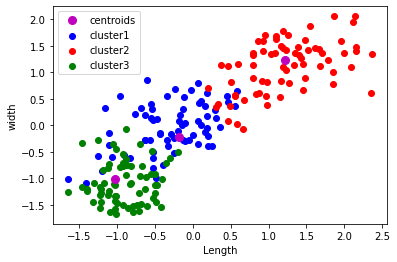

In [88]:
cluster1=df2_scaled[labels==0]
cluster2=df2_scaled[labels==1]
cluster3=df2_scaled[labels==2]

plt.scatter(cluster1[:,3] ,cluster1[:,4],color='blue',label='cluster1')
plt.scatter(cluster2[:,3],cluster2[:,4],color='red',label='cluster2')
plt.scatter(cluster3[:,3],cluster3[:,4],color='green',label='cluster3')

plt.plot(centroids[:,0],centroids[:,1],'mo',markersize=8,label='centroids')
plt.xlabel('Length')
plt.ylabel('width')
plt.legend()
plt.show()

In [89]:
#check accuracy
scaler=StandardScaler()
Xnew=scaler.fit_transform(X)
ahc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(X)


print("Accuracy score = ",accuracy_score(Y,y_ahc)*100)

Accuracy score =  3.3333333333333335


## KNN

In [90]:
from sklearn.utils.multiclass import check_classification_targets
#cluster the dataset using KNN and k = 3
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,Y_train)
 
y_pred=classifier.predict(X_test)

print(classification_report(Y_test,y_pred))






              precision    recall  f1-score   support

           1       1.00      0.73      0.84        26
           2       0.83      1.00      0.91        15
           3       0.85      1.00      0.92        22

    accuracy                           0.89        63
   macro avg       0.89      0.91      0.89        63
weighted avg       0.91      0.89      0.89        63



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


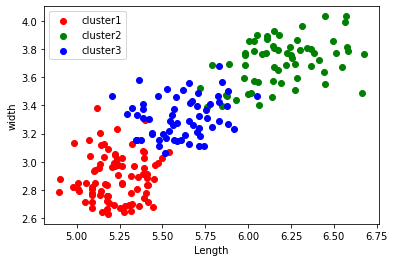

In [91]:
#Plot a scatter plot for "Lenght" and "Width" clusters


cm= confusion_matrix(Y_test,y_pred)
plt.scatter(X[y==0,3],X[y==0,4],c='red',label='cluster1')
plt.scatter(X[y==1,3],X[y==1,4], c='green',label='cluster2')
plt.scatter(X[y==2,3],X[y==2,4], c='blue',label='cluster3')
plt.xlabel("Length")
plt.ylabel("width")
plt.legend()
plt.show()

In [92]:
#Results - compare prediction results with known values of Y
scalar=StandardScaler()
Xnew=scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test= train_test_split(Xnew,Y,test_size=0.3, random_state=101,shuffle=True)

classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,Y_train)


results=classifier.predict(X_test)
print('Accurancy score = ',accuracy_score(results,Y_test)*100)

ac1=accuracy_score(results,Y_test)


Accurancy score =  88.88888888888889


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [93]:
#draw a confusion matrix of KNN
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,Y_train)
 
y_pred=classifier.predict(X_test)

print(confusion_matrix(Y_test,y_pred))


[[19  3  4]
 [ 0 15  0]
 [ 0  0 22]]


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<function matplotlib.pyplot.show>

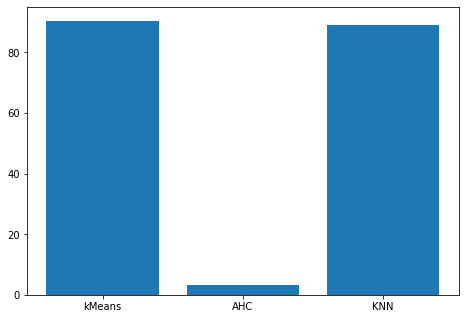

In [94]:
#Bar chart
KmeansTest=km.fit_predict(X_test)
a_test=ahc.fit_predict(X_test)
knn_test=classifier.predict(X_test)

accKmeans=accuracy_score(Y_test,rst)*100
accAhc=accuracy_score(Y,y_ahc)*100
accknn=accuracy_score(results,Y_test)*100

fsize=plt.figure()
simple=fsize.add_axes([0,0,1,1])
pred=['kMeans','AHC','KNN']
acc=[accKmeans,accAhc,accknn]
simple.bar(pred,acc)
plt.show